# 优达学城-深度学习-任务1：notMNIST

In [8]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

# 可视化

随机选取训练集和测试集文件夹下每个字母各10张图片，并以网格的形式可视化出来。

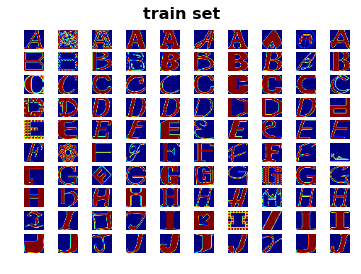

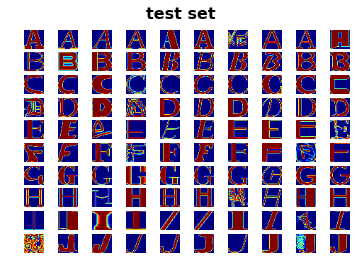

In [9]:
import random
import matplotlib.image as mpimg

def plot_samples(data_folders, sample_size, title=None):
    fig = plt.figure()
    folder_names = os.listdir(data_folders)
    if title: fig.suptitle(title, fontsize=16, fontweight='bold')
    for folder_name in folder_names:
        image_files = os.listdir(data_folders + '/' + str(folder_name)) #子文件下的各个字母图片文件名列表
        image_sample = random.sample(image_files, sample_size)
        for image in image_sample:
            image_file = data_folders + '/' + str(folder_name) + '/' + image #图片在计算机本地的地址
            ax = fig.add_subplot(len(folder_names), sample_size, sample_size * folder_names.index(folder_name) + image_sample.index(image) + 1)
            image = mpimg.imread(image_file)
            ax.imshow(image)
            ax.set_axis_off()
    plt.show()

plot_samples("E://Python/data/notMNIST_large", 10, 'train set')
plot_samples("E://Python/data/notMNIST_large", 10, 'test set')

# 转化为3D数组并归一化

给定训练集或测试集文件，读取各个字母文件夹下的图片文件，转化为3D数组的形式，然后对数组数据依次执行归一化操作。有的字母下面的图片文件可能无法读取，不过没有关系，设计一个`try,except`语句，直接跳过忽略就好了。

In [10]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel
    
def load_letter(data_folders, image_file_names, folder_name, min_num_images):
    num_images = 0 
    #image_files = os.listdir('E://Python/data/notMNIST_small/' + str(folder_name)) #每个字母文件夹下所有图片的标题列表，通过join地址的方法不行
    print('%s 字母下有效文件数：%d' % (str(folder_name), len(image_file_names)))
    dataset = np.ndarray(shape=(len(image_file_names), image_size, image_size), dtype=np.float32)
    for image in image_file_names:
        image_address = data_folders + '/' + folder_name + '/' + image
        try:
            image_data = (ndimage.imread(image_address).astype(float) - pixel_depth / 2) / pixel_depth
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
            dataset[num_images, :, :] = image_data               
            num_images = num_images + 1               
        except IOError as e:
            print('无法读取文件:', image_address, ':', e, '-忽略...')
    #检查图片数量是否达到合格水平（min_num_images） 
    dataset = dataset[0:num_images, :, :]
    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' %
                (num_images, min_num_images))

    print('Full dataset tensor:', dataset.shape)
    print('均值:', np.mean(dataset))
    print('标准差:', np.std(dataset))
    return dataset

#数组矩阵（dataset）序列化（Pickle）
def pickle_data(data_folders, min_num_images_per_class):
    dataset_names = []
    folder_names = os.listdir(data_folders)
    for folder_name in folder_names:
        image_file_names = os.listdir(data_folders + str(folder_name))
        dataset = load_letter(data_folders, image_file_names, folder_name, min_num_images_per_class)
        set_filename = 'E://Python/data/' + data_folders[25:30] + '/' + folder_name + '.pickle'
        dataset_names.append(set_filename)
        with open(set_filename, 'wb') as f:
            pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
    return dataset_names
        
        
test_datasets = pickle_data("E://Python/data/notMNIST_small/", 1800)
train_datasets = pickle_data("E://Python/data/notMNIST_large/", 45000)

A 字母下有效文件数：1873
无法读取文件: E://Python/data/notMNIST_small//A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png : cannot identify image file 'E://Python/data/notMNIST_small//A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png' -忽略...
Full dataset tensor: (1872, 28, 28)
均值: -0.132626
标准差: 0.445128
B 字母下有效文件数：1873
Full dataset tensor: (1873, 28, 28)
均值: 0.00535609
标准差: 0.457115
C 字母下有效文件数：1873
Full dataset tensor: (1873, 28, 28)
均值: -0.141521
标准差: 0.44269
D 字母下有效文件数：1873
Full dataset tensor: (1873, 28, 28)
均值: -0.0492167
标准差: 0.459759
E 字母下有效文件数：1873
Full dataset tensor: (1873, 28, 28)
均值: -0.0599148
标准差: 0.45735
F 字母下有效文件数：1873
无法读取文件: E://Python/data/notMNIST_small//F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png : cannot identify image file 'E://Python/data/notMNIST_small//F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png' -忽略...
Full dataset tensor: (1872, 28, 28)
均值: -0.118185
标准差: 0.452279
G 字母下有效文件数：1872
Full dataset tensor: (1872, 28, 28)
均值: -0.0925503
标准差: 0.449006
H 字母下有效文件数：1872
Full dataset t

# 问题2：验证归一化图像

In [11]:
test_datasets
train_datasets

['E://Python/data/large/A.pickle',
 'E://Python/data/large/B.pickle',
 'E://Python/data/large/C.pickle',
 'E://Python/data/large/D.pickle',
 'E://Python/data/large/E.pickle',
 'E://Python/data/large/F.pickle',
 'E://Python/data/large/G.pickle',
 'E://Python/data/large/H.pickle',
 'E://Python/data/large/I.pickle',
 'E://Python/data/large/J.pickle']

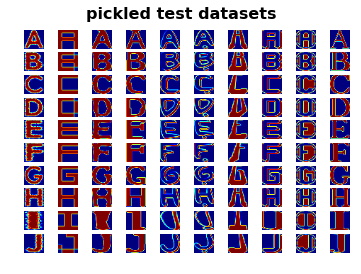

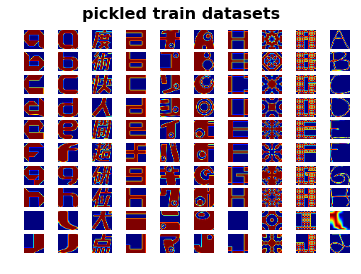

In [84]:
#画出序列化数组
def plot_pickle_file(data_folders, sample_size, datasets, title = None):
    fig = plt.figure()
    if title: fig.suptitle(title, fontsize=16, fontweight='bold')
    folder_names = os.listdir(data_folders)
    for folder_name in folder_names:        
        pickle_file = "E://Python/data/" + data_folders[25:30] + '/' + folder_name + '.pickle'  # index 0 should be all As, 1 = all Bs, etc.
        with open(pickle_file, 'rb') as f:
            letter_set = pickle.load(f)  # unpickle
            sample_idx = np.random.randint(len(letter_set), size = sample_size)  # pick a random image index               
            for index,image in enumerate(letter_set):
                if index == sample_size: break
                ax = fig.add_subplot(len(datasets), sample_size, sample_size * datasets.index(pickle_file) + index + 1)
                ax.imshow(image)
                ax.set_axis_off()
                ax.imshow(image)
            
plot_pickle_file("E://Python/data/notMNIST_small/", 10, test_datasets, 'pickled test datasets')
plot_pickle_file("E://Python/data/notMNIST_large/", 10, train_datasets, 'pickled train datasets')

# 问题 3: 验证数据平衡

从训练集和测试集的pickle文件中读取图像，并统计各个字母类别下图像个数，发现训练集和测试集各个类别下样本数目基本一致，可是说数据集是平衡的。

A train data count : 52909
A test data count : 1872
B train data count : 52911
B test data count : 1873
C train data count : 52912
C test data count : 1873
D train data count : 52911
D test data count : 1873
E train data count : 52912
E test data count : 1873
F train data count : 52912
F test data count : 1872
G train data count : 52912
G test data count : 1872
H train data count : 52912
H test data count : 1872
I train data count : 52912
I test data count : 1872
J train data count : 52911
J test data count : 1872


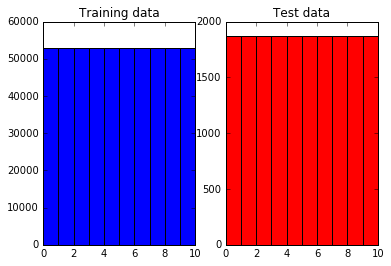

In [13]:
letters = [chr(ord('A') + i) for i in range(0,10) ]
large_letter_count = []
small_letter_count = []

def verify_data_balance():
    for letter in letters:
        letter_train_data = pickle.load(open('E:/Python/data/large/' + letter + '.pickle', "rb"))
        large_letter_count.append(len(letter_train_data))
        print(letter + " train data count : " + str(len(letter_train_data)))
        
        letter_test_data = pickle.load(open('E:/Python/data/small/' + letter + '.pickle', "rb"))
        small_letter_count.append(len(letter_test_data))
        print(letter + " test data count : " + str(len(letter_test_data)))        
    return large_letter_count, small_letter_count

def plot():
    fig, ax = plt.subplots(1, 2)
    large_letter_count, small_letter_count = verify_data_balance()
    ind = np.arange(10)
    width = 1
    ax[0].bar(ind, large_letter_count, width, color='b')
    ax[0].set_title("Training data")
    ax[1].bar(ind, small_letter_count, width, color='r')
    ax[1].set_title("Test data")
    plt.show()

plot()

# 建立验证集

我们从train_dataset中分割出验证集和训练集，从test_set中分割出一定大小的测试集。

设定训练集（train set）大小为200000，总计有十个类别，每个类别下各选取20000张作为训练集；

设定验证集（valid set）大小为10000，总计有十个类别，每个类别下各选取1000张作为验证集。

In [14]:
#创建等待填入空白数据集（dataset）和标签集（labels）数组，数据类型分别为浮点型（float）和整型（int）
def make_arrays(nb_rows, img_size):
    if nb_rows:
        dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
        labels = np.ndarray(nb_rows, dtype=np.int32) 
    else:
        dataset, labels = None, None
    return dataset, labels

def merge_datasets(pickle_files, dataset_size, valid_size=0):    
    num_classes = len(pickle_files)
    valid_dataset, valid_labels = make_arrays(valid_size, image_size) # 验证集
    train_dataset, train_labels = make_arrays(train_size, image_size) # 训练集   
    vsize_per_class = valid_size // num_classes # 双斜杠：浮点运算符，得到的结果进行四舍五入
    tsize_per_class = train_size // num_classes
    
    start_v, start_t = 0, 0
    end_v, end_t = vsize_per_class, tsize_per_class
    end_l = vsize_per_class + tsize_per_class    
    for label, pickle_file in enumerate(pickle_files):
        try:
            with open(pickle_file, 'rb') as f:
                letter_set = pickle.load(f)
                #print(letter_set)
                # 将字母集随机打乱
                np.random.shuffle(letter_set)
                if valid_dataset is not None:
                    valid_letter = letter_set[:vsize_per_class, :, :]
                    valid_dataset[start_v:end_v, :, :] = valid_letter
                    valid_labels[start_v:end_v] = label
                                       
                    start_v += vsize_per_class
                    end_v += vsize_per_class
                    
                    train_letter = letter_set[vsize_per_class:end_l, :, :]
                    train_dataset[start_t:end_t, :, :] = train_letter
                    train_labels[start_t:end_t] = label
                    start_t += tsize_per_class
                    end_t += tsize_per_class                                       
        except Exception as e:
            print('无法处理来自', pickle_file, ':', e )
            raise
    return valid_dataset, valid_labels, train_dataset, train_labels

#专门写了一段提取测试集的代码，源代码貌似有误
def merge_test_datasets(pickle_files, dataset_size):
    num_classes = len(pickle_files)
    test_dataset, test_labels = make_arrays(test_size, image_size)
    test_size_per_class = test_size // num_classes
    start_test = 0
    end_test = test_size_per_class
    for label, pickle_file in enumerate(pickle_files):
        try:
            with open(pickle_file, 'rb') as f:
                letter_set = pickle.load(f)
                np.random.shuffle(letter_set)
                test_letter = letter_set[:test_size_per_class, :, :]
                test_dataset[start_test:end_test, :, :] = test_letter
                test_labels[start_test:end_test] = label
                
                start_test += test_size_per_class
                end_test += test_size_per_class
        except Exception as e:
            print('无法处理来自', pickle_file, ':', e )
            raise
    return test_dataset, test_labels

# 设置训练集、验证集、测试集大小
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(train_datasets, train_size, valid_size)
test_dataset, test_labels= merge_test_datasets(test_datasets, test_size) #事实上，除了第一个参数，后面两个参数完全可以删除

print('训练集:', train_dataset.shape, train_labels.shape)
print('验证集:', valid_dataset.shape, valid_labels.shape)
print('测试集:', test_dataset.shape, test_labels.shape)

训练集: (200000, 28, 28) (200000,)
验证集: (10000, 28, 28) (10000,)
测试集: (10000, 28, 28) (10000,)


# 问题4

证明随机打乱（shuffle）后的数据依旧是正确的。

In [15]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels
    
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

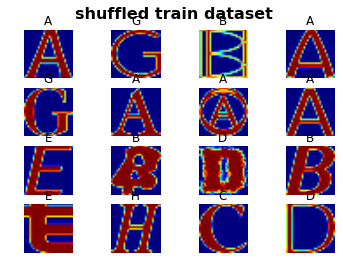

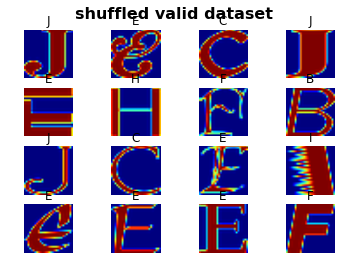

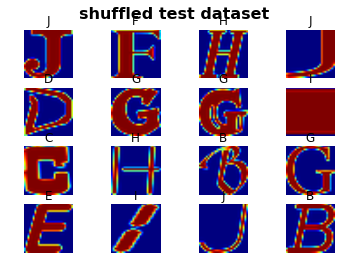

In [16]:
def plot_randonmize_dataset(dataset, labels, title):
    plt.suptitle(title, fontsize=16, fontweight='bold')
    items = random.sample(range(len(labels)), 16) # 从标签中随机选取12个样本，例如返回[2491, 7084, 8107, ..., 2224, 5187]
    for i, item in enumerate(items):
        plt.subplot(4, 4, i + 1)
        plt.axis('off')
        plt.title(chr(ord('A') + labels[item])) # 标注相应类别的字母标签，ord('A')等于65
        plt.imshow(dataset[item]) # plt.imshow()用于打开数组一类的数据，可以是浮点、整型或RGB
    plt.show()    
    
plot_randonmize_dataset(train_dataset, train_labels, 'shuffled train dataset')    
plot_randonmize_dataset(valid_dataset, valid_labels, 'shuffled valid dataset')
plot_randonmize_dataset(test_dataset, test_labels, 'shuffled test dataset')

In [17]:
pickle_file = 'E:/Python/data/notMNIST.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    } 
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

In [18]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800512



# 问题5：解决重复样本问题


通过上述步骤，训练数据集或测试集中可能包含了许多重复样本。如果你期望在没有重复样本的环境中使用模型，训练集和测试集之间的重叠会导致预测结果不准确。在这个问题中需要解决的是：

- 得到训练集、验证集、测试集之间的重复程度
- 怎样定义图片接近相同（near duplicates）？
- 创建清洗（sanitized）过后的验证集和测试集，并与之前提交结果的准确率进行比较

解决图片重复问题，主要有三个思路：

- 数组比较法
- Manhattan norm
- hash comparison（哈希比较）


## 数组比较法

In [46]:
def display_overlap(overlap, source_dataset, target_dataset):
    item = random.choice(list(overlap.keys()))
    imgs = np.concatenate(([source_dataset[item]], target_dataset[overlap[item][0:7]]))
    plt.suptitle(item)
    for i, img in enumerate(imgs):
        plt.subplot(2, 4, i+1)
        plt.axis('off')
        plt.imshow(img)

In [34]:
def extract_overlap(dataset_1, dataset_2):
    overlap = dict()
    for i, img_1 in enumerate(dataset_1):
        for j, img_2 in enumerate(dataset_2):
            if np.array_equal(img_1, img_2):
                if not i in overlap.keys():
                    overlap[i] = []
                overlap[i].append(j)    
    return overlap

In [29]:
%time overlap_test_train = extract_overlap(test_dataset[:200], train_dataset)

Wall time: 3min 1s


Number of overlaps: 27


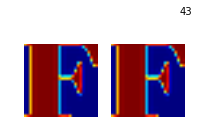

In [49]:
print('Number of overlaps:', len(overlap_test_train.keys()))
display_overlap(overlap_test_train, test_dataset[:100], train_dataset)

## Manhattan 距离

In [52]:
MAX_MANHATTAN_NORM = 10

def extract_overlap_near(dataset_1, dataset_2):
    overlap = {}
    for i, img_1 in enumerate(dataset_1):
      for j, img_2 in enumerate(dataset_2):
        diff = img_1 - img_2
        m_norm = np.sum(np.abs(diff))
        if m_norm < MAX_MANHATTAN_NORM:
          if not i in overlap.keys():
            overlap[i] = []
          overlap[i].append(j)
    return overlap

In [53]:
%time overlap_test_train_near = extract_overlap_near(test_dataset[:200], train_dataset)

Wall time: 4min 26s


Number of near overlaps: 51


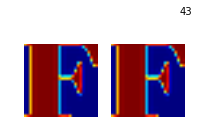

In [60]:
print('Number of near overlaps:', len(overlap_test_train_near.keys()))
display_overlap(overlap_test_train_near, test_dataset[:200], train_dataset)

## Hash comparison（哈希比较）

哈希算法通过一个函数，把任意长度的数据转换为一个长度固定的数据串。哈希算法通常用来加密，而且通常这种加密是不可逆的。hashlib是Python中用于hash加密的库，它支持多种加密算法，如md5,sha1,sha256等等。

In [63]:
import hashlib
def extract_overlap_hash(dataset_1, dataset_2):
  dataset_hash_1 = [hashlib.sha256(img).hexdigest() for img in dataset_1]
  dataset_hash_2 = [hashlib.sha256(img).hexdigest() for img in dataset_2]
  overlap = {}
  for i, hash1 in enumerate(dataset_hash_1):
    for j, hash2 in enumerate(dataset_hash_2):
      if hash1 == hash2:
        if not i in overlap.keys():
          overlap[i] = []
        overlap[i].append(j) ## use np.where
  return overlap

测试集（test_dataset）与训练集（train_dataset）

In [64]:
%time overlap_test_train = extract_overlap_hash(test_dataset[:200], train_dataset)

Wall time: 4.2 s


In [65]:
def extract_overlap_hash_where(dataset_1, dataset_2):
  dataset_hash_1 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_1])
  dataset_hash_2 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_2])
  overlap = {}
  for i, hash1 in enumerate(dataset_hash_1):
    duplicates = np.where(dataset_hash_2 == hash1)
    if len(duplicates[0]):
      overlap[i] = duplicates[0]
  return overlap

In [66]:
%time overlap_test_train = extract_overlap_hash_where(test_dataset[:200], train_dataset)

Wall time: 2.78 s


## 清洗数据，去掉那些接近相同（near duplicate）的样本

In [67]:
def sanetize(dataset_1, dataset_2, labels_1):
  dataset_hash_1 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_1])
  dataset_hash_2 = np.array([hashlib.sha256(img).hexdigest() for img in dataset_2])
  overlap = [] # list of indexes
  for i, hash1 in enumerate(dataset_hash_1):
    duplicates = np.where(dataset_hash_2 == hash1)
    if len(duplicates[0]):
      overlap.append(i) 
  return np.delete(dataset_1, overlap, 0), np.delete(labels_1, overlap, None)

去掉测试集（前200个）与训练集之间接近相同的样本

In [68]:
%time test_dataset_sanit, test_labels_sanit = sanetize(test_dataset[:200], train_dataset, test_labels[:200])
print('Overlapping images removed: ', len(test_dataset[:200]) - len(test_dataset_sanit))

Wall time: 2.75 s
Overlapping images removed:  27


去掉测试集（全部）与训练集之间接近相同的样本

In [69]:
%time test_dataset_sanit, test_labels_sanit = sanetize(test_dataset, train_dataset, test_labels)
print('Overlapping images removed: ', len(test_dataset) - len(test_dataset_sanit))

Wall time: 49.4 s
Overlapping images removed:  1276


去掉验证集与训练集之间接近相同的样本

In [70]:
%time valid_dataset_sanit, valid_labels_sanit = sanetize(valid_dataset, train_dataset, valid_labels)
print('Overlapping images removed: ', len(valid_dataset) - len(valid_dataset_sanit))

Wall time: 48.2 s
Overlapping images removed:  1071


再次将训练集、验证集、测试集整合到一个文件中，由于去掉了测试集、验证集与训练集之间的重复样本，新的pickle文件大小相比原来小了许多。

In [71]:
pickle_file_sanit = 'notMNIST_sanit.pickle'

try:
  f = open(pickle_file_sanit, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset_sanit,
    'valid_labels': valid_labels_sanit,
    'test_dataset': test_dataset_sanit,
    'test_labels': test_labels_sanit,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [72]:
statinfo = os.stat(pickle_file_sanit)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 683430932


# 问题6

采用sklearn.linear_model的LogisticRegression模型，并分别使用50、100、1000和5000个样本训练它，如果可以的话，尝试用全部数据来训练这个现成的（off-the-shelf）模型。

In [77]:
def predict_accuracy(sample_size):
    regr = LogisticRegression()
    X_test = test_dataset.reshape(test_dataset.shape[0], 28 * 28)  # 测试集数据格式28*28大小
    y_test = test_labels
    
    X_train = train_dataset[:sample_size].reshape(sample_size, 784)
    y_train = train_labels[:sample_size]
    %time regr.fit(X_train, y_train)
    
    print('样本大小为：', sample_size, '时，模型预测准确率：', regr.score(X_test, y_test))

In [78]:
predict_accuracy(50)

Wall time: 40.6 ms
样本大小为： 50 时，模型预测准确率： 0.5186


In [79]:
predict_accuracy(100)

Wall time: 101 ms
样本大小为： 100 时，模型预测准确率： 0.7174


In [80]:
predict_accuracy(1000)

Wall time: 2.34 s
样本大小为： 1000 时，模型预测准确率： 0.8397


In [81]:
predict_accuracy(5000)

Wall time: 19.9 s
样本大小为： 5000 时，模型预测准确率： 0.8502


In [82]:
predict_accuracy(200000)

Wall time: 25min 27s
样本大小为： 200000 时，模型预测准确率： 0.8945
